### TO DO 
* ~Include account attributes in query~   
* ~Append account attributes to final output~  
* ~revisit original query~ 
* ~Add individual name back to node labels~
* ~Generate more summary statistics for output~  
* Add creation of member network work key tables: individual_id | network ; member_nbr | network  
* Add creation of member network summary table: network | total loans | total savings | number of members | central member
* Fix pdf output  
* Fix regex group error https://stackoverflow.com/questions/39901550/python-userwarning-this-pattern-has-match-groups-to-actually-get-the-groups  
* Add gephx file output

In [1]:
import pandas as pd
import numpy as np
import networkx as nx
#import pyodbc
import sqlite3
import matplotlib.pyplot as plt
from matplotlib.backends.backend_pdf import PdfPages
import matplotlib.gridspec as gridspec

%matplotlib inline
plt.rcParams['figure.figsize'] = (10, 6)
plt.style.use('ggplot')

conn = sqlite3.connect('demo_data.db')

In [106]:
####################################################################
# NEW QUERY FOR HANDLING DATA IN PYTHON TO CREATE ATTRIBUTE DICTIONARIES
####################################################################

node_individual_query = '''
SELECT individual_id,  
first_name ||' '||last_name||' '||individual_id [label],
first_name ||' '||last_name [name],
open_date,
'individual'[type]
from individual_today

'''

member_individual_query = '''
SELECT *, member_nbr [label],
'membership'[type]
FROM agr_membertotal_today 
'''

edge_query = '''
select member_nbr [source], individual_id [target], participation_type
FROM membershipparticipant_today
'''

In [109]:
##Generate graph using from_pandas_edgelist and attribute dictionaries 

ind = pd.read_sql(node_individual_query, conn)
mem = pd.read_sql(member_individual_query, conn)
edges= pd.read_sql(edge_query, conn)

# make attribute dictionary
mem_dict = mem.set_index('member_nbr')
mem_dict = mem_dict.to_dict('index')
ind_dict = ind.set_index('individual_id')
ind_dict = ind_dict.to_dict('index')

mem_dict.update(ind_dict)

#from pandas edgelist
G = nx.from_pandas_edgelist(edges, edge_attr = True)
nx.set_node_attributes(G, mem_dict)

len(G)

200

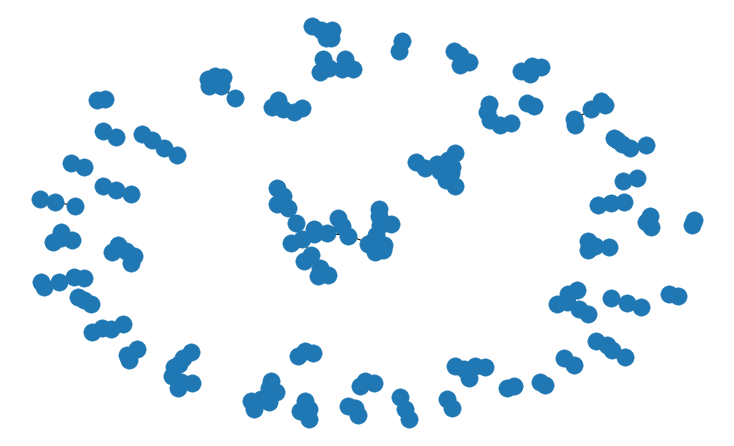

In [110]:
nx.draw(G)

### Basic stats

In [240]:
print(nx.info(G))
print(f'Connected components: {str(nx.number_connected_components(G))}')

Name: 
Type: Graph
Number of nodes: 200
Number of edges: 150
Average degree:   1.5000
Connected components: 50
Connected components: 50


In [112]:
# Degrees
degree = nx.degree(G)
degree

DegreeView({7503: 1, 9960: 2, 3987: 1, 8846: 1, 4924: 3, 5941: 1, 4364: 1, 1951: 3, 5565: 1, 6572: 2, 7985: 3, 1499: 2, 2863: 2, 3841: 1, 3676: 1, 9307: 1, 3811: 2, 2367: 1, 4651: 1, 3598: 1, 7163: 1, 1973: 2, 2240: 1, 7307: 2, 6653: 1, 8965: 1, 3055: 1, 1757: 1, 6131: 2, 7293: 1, 2387: 1, 6035: 2, 3232: 1, 1359: 2, 2047: 1, 1306: 2, 8528: 2, 668: 3, 2813: 3, 3687: 4, 5437: 2, 1126: 1, 7708: 1, 6638: 1, 1225: 2, 7905: 1, 4764: 3, 3145: 1, 6431: 2, 5980: 1, 3357: 3, 4717: 2, 7008: 2, 7309: 2, 7524: 3, 2040: 1, 3838: 3, 7067: 1, 6117: 1, 7945: 2, 7179: 2, 8884: 2, 6295: 3, 6354: 1, 8503: 2, 4225: 2, 2701: 1, 8962: 1, 5972: 3, 6996: 3, 4525: 1, 1785: 1, 3809: 1, 5180: 1, 5178: 1, 4588: 1, 1560: 1, 4172: 1, 8201: 3, 1692: 1, 7673: 6, 6085: 2, 1817: 2, 3493: 1, 2454: 2, 1538: 1, 6288: 3, 1293: 3, 4889: 1, 2411: 1, 1993: 1, 2459: 1, 5149: 2, 9281: 2, 5316: 1, 6263: 3, 8929: 5, 7978: 1, 3414: 2, 6963: 1, 7628: 2, 1157: 1, 5443: 3, 5591: 3, 1165: 1, 3695: 1, 574: 1, 8271: 2, 2511: 1, 3496: 1, 

[1, 2, 1, 1, 3, 1, 1, 3, 1, 2, 3, 2, 2, 1, 1, 1, 2, 1, 1, 1, 1, 2, 1, 2, 1, 1, 1, 1, 2, 1, 1, 2, 1, 2, 1, 2, 2, 3, 3, 4, 2, 1, 1, 1, 2, 1, 3, 1, 2, 1, 3, 2, 2, 2, 3, 1, 3, 1, 1, 2, 2, 2, 3, 1, 2, 2, 1, 1, 3, 3, 1, 1, 1, 1, 1, 1, 1, 1, 3, 1, 6, 2, 2, 1, 2, 1, 3, 3, 1, 1, 1, 1, 2, 2, 1, 3, 5, 1, 2, 1, 2, 1, 3, 3, 1, 1, 1, 2, 1, 1, 1, 1, 3, 2, 1, 1, 1, 2, 1, 2, 3, 1, 1, 1, 2, 2, 2, 4, 1, 2, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 1, 2, 1, 1, 1, 1, 2, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]


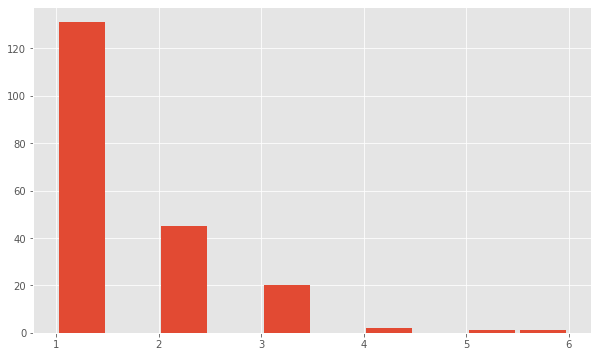

In [113]:
#Degree histogram
plt.rcParams['figure.figsize'] = (10, 6)
degrees = [node[1] for node in degree]
print (degrees)
plt.hist(degrees, bins=10, rwidth=0.9)
plt.show()

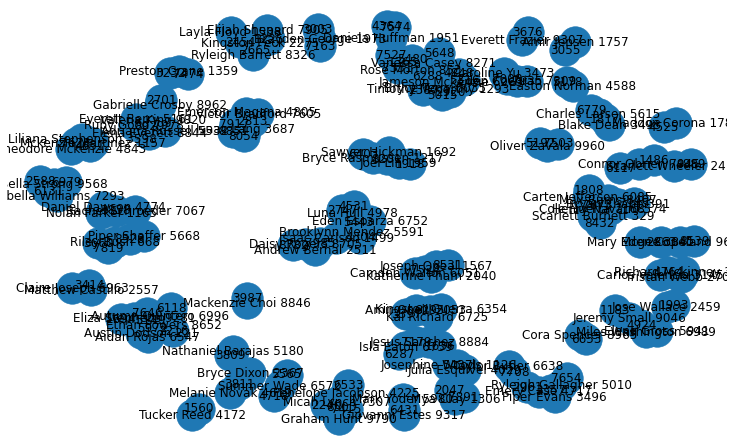

In [114]:
# Show all participants
pos = nx.spring_layout(G)
node_labels = nx.get_node_attributes(G,'label')
nx.draw(G, pos=pos,   node_size=1000)
nx.draw_networkx_labels(G, pos=pos, labels=node_labels )
plt.show()

### Data prep and examining subgraphs

In [121]:
def generate_color_map(graph_object, individual_df):
    '''generates a color map corresponding with individuals or memberships'''
    individual_nodes = list(ind['individual_id'])

    for n in graph_object.nodes:
        graph_object.nodes[n]['color'] = 'c' if n in individual_nodes else 'm'
    
    colors = [node[1]['color'] for node in graph_object.nodes(data = True)]
    return(colors)

In [177]:
def separate_members_individuals(graph_object):
    '''separates the member nodes and individual nodes from a subgraph'''
    
    subgraph_individuals = {}
    subgraph_members = {}

    for node in graph.nodes.data():
        dic = {node[0]:node[1]}

        if node[1]['type']== 'individual':
            subgraph_individuals.update(dic)

        if node[1]['type']=='membership':
            subgraph_members.update(dic)
            
    return(subgraph_individuals, subgraph_members)

In [115]:
# make subgraphs from all the connected components within the original dataset
S = [G.subgraph(c).copy() for c in nx.connected_components(G)]

In [116]:
# node count summary statisitcs of subgraphs
node_count = []
for sub in S:
    count = len(nx.nodes(sub))
    node_count.append(count)
    
print(f'min nodes {min(node_count)}')
print(f'max nodes {max(node_count)}')
print(f'average nodes {sum(node_count)/len(node_count)}')


min nodes 2
max nodes 12
average nodes 4.0


In [117]:
# filter for subgraphs with n nodes
n =6 
multi=[]
for sub in S:
    nodes = nx.nodes(sub)
    node_count = len(nodes)
    if node_count>=n:
        multi.append(sub)

print(f'{len(multi)} networks with at least {n} nodes')

8 networks with at least 6 nodes


In [118]:
## Code for flattening a subgraph 
#flat_list = [item for sublist in list(multi[0].edges) for item in sublist ]

#degree view
list(multi[0].degree)

#edge view
list(multi[0].edges)

#nodes
list(multi[0].nodes)

[6752, 8705, 5443, 8782, 2511, 4304, 7985, 4978, 4531, 5591, 1499, 2747]

In [119]:
# set colors
member_nodes = list(edges['source'])
individual_nodes = list(edges['target'])
for n in G.nodes():
    G.nodes[n]['color'] = 'b' if n in member_nodes else 'o'
colors = [node[1]['color'] for node in G.nodes(data=True)]

### Prototype of subgraph visualization

The Brooklynn Mendez 5591 network


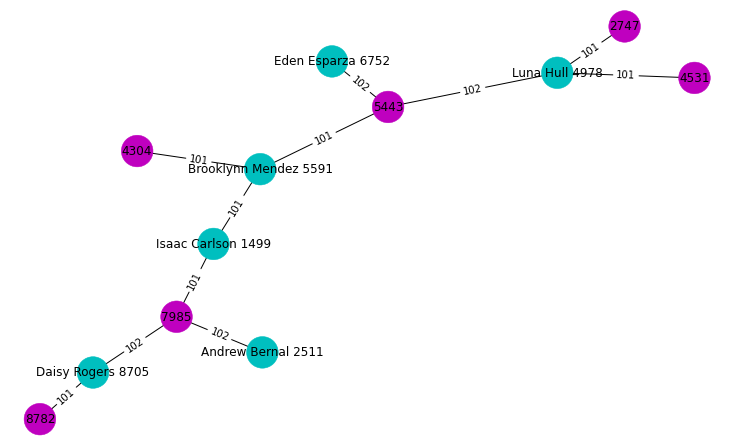

Member Subgraph Characteristics
Center:	Brooklynn Mendez 5591
Nodes:		12
Individuals:	6
Memberships:	6

Subgraph Accounts Summary
total savings:		$464,957.00
total loans:		$4,693,844.00
PPM:			4.7
dividends paid:		$4,649.57
interest received:	$234,692.20


In [241]:
#specify subgraph
graph = multi[0]

colors = generate_color_map(graph,ind)

#find center of graph and use it to determine name
center = nx.center(graph)[0]
title = graph.nodes[center]['label']

#determine number of degrees and nodes
degrees = nx.degree(graph)
node_count = len(nx.nodes(graph))

#layout for display
pos = nx.spring_layout(graph)

#draw function
nx.draw(graph, pos=pos, node_color=colors, node_size=1000)

#add node labels
node_labels = nx.get_node_attributes(graph,'label')
nx.draw_networkx_labels(graph, pos=pos, labels = node_labels )

#add edge labels
edge_labels = nx.get_edge_attributes(graph, 'participation_type')
nx.draw_networkx_edge_labels(graph, pos, edge_labels)

i,m = separate_members_individuals(graph)

i = pd.DataFrame.from_dict(i, orient='index')
m = pd.DataFrame.from_dict(m, orient='index')

total_loan = sum(m['open_loan_bal'])
total_saving = sum(m['open_sv_bal'])
loan_count = sum(m['opn_ln_all_cnt'])
saving_count = sum(m['opn_sv_all_cnt'])
total_dividend = sum(m['div_ytd_amt'])
total_interest = sum(m['int_ytd_amt'])

products_per_member = (loan_count + saving_count) / len(m)

#Output
print(f'The {title} network')

plt.show()
#print(nx.info(graph))
print(f'Member Subgraph Characteristics')
print('='*30)
print(f'Center:\t{title}')
print(f'Nodes:\t\t{node_count}')
print(f'Individuals:\t{len(i)}')
print(f'Memberships:\t{len(m)}')
print()
print(f'Subgraph Accounts Summary')
print(f'='*30)
print(f'total savings:\t\t${total_saving:,.2f}')
print(f'total loans:\t\t${total_loan:,.2f}')
print(f'PPM:\t\t\t{products_per_member:.2n}')
print(f'dividends paid:\t\t${total_dividend:,.2f}')
print(f'interest received:\t${total_interest:,.2f}')


In [189]:
pd.DataFrame.from_dict(z, orient='index')

,cls_ln_cnt,cls_sv_cnt,opn_ln_all_cnt,opn_sv_all_cnt,open_loan_bal,open_sv_bal,div_ytd_amt,int_ytd_amt,sv_sd_bal,sv_sd_cnt,sv_cert_bal,sv_cert_cnt,max_days_delnq_cnt,max_mths_delnq_cnt,wo_ln_cnt,wo_ln_bal,label,type,color
5443,1,4,4,3,1117901,144516,1445.16,55895.05,40365,3,104151,0,74.0,2,0,0,5443,membership,m
8782,3,0,0,3,0,86759,867.59,0.00,50352,3,36407,0,32.0,1,0,0,8782,membership,m
4304,1,0,3,3,929415,87715,877.15,46470.75,21267,1,66448,2,40.0,1,0,0,4304,membership,m
7985,3,0,4,2,1151063,68249,682.49,57553.15,31024,2,37225,0,32.0,1,0,0,7985,membership,m
4531,0,1,4,1,1495465,71844,718.44,74773.25,40115,1,31729,0,0.0,0,0,0,4531,membership,m
2747,0,4,0,1,0,5874,58.74,0.00,3245,1,2629,0,0.0,0,0,0,2747,membership,m


### Visualizing all subgraphs

The Brooklynn Mendez 5591 network
12 nodes


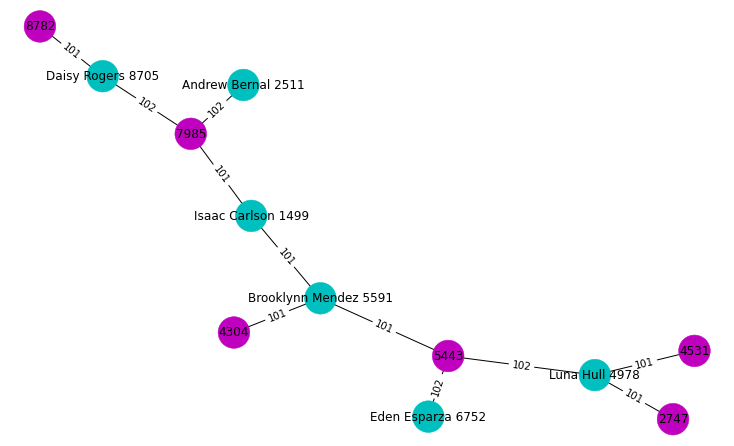

The Isaac Lang 3687 network
7 nodes


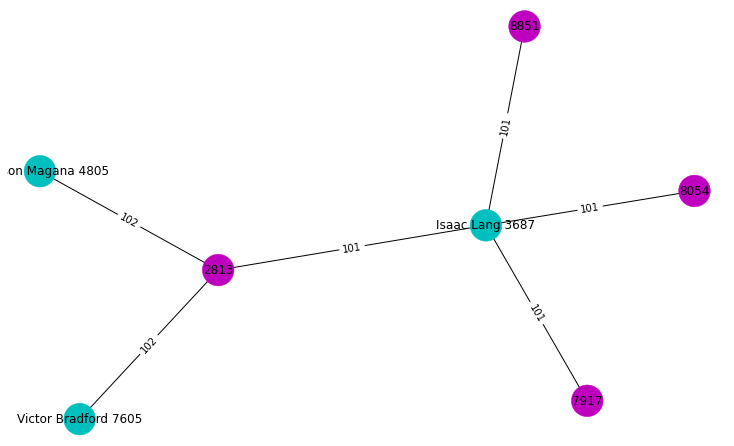

The 3357 network
6 nodes


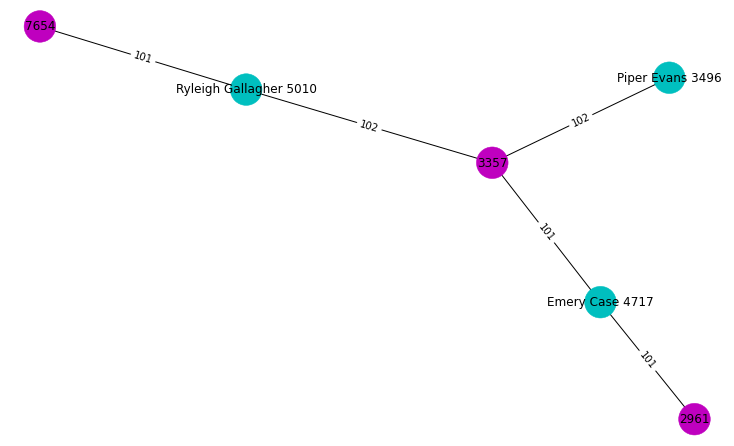

The 5972 network
6 nodes


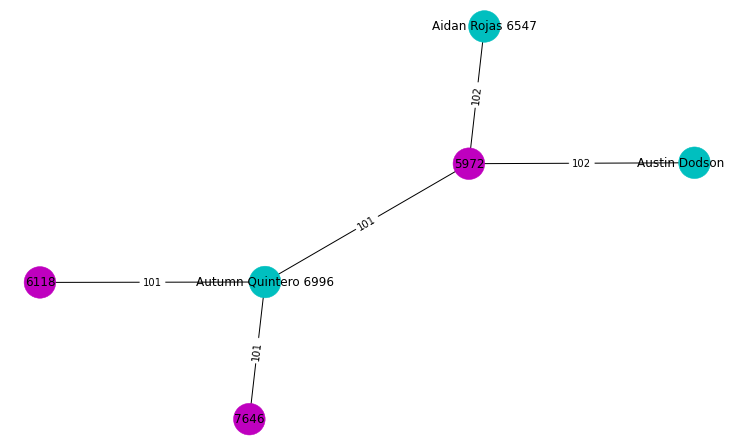

The 8201 network
6 nodes


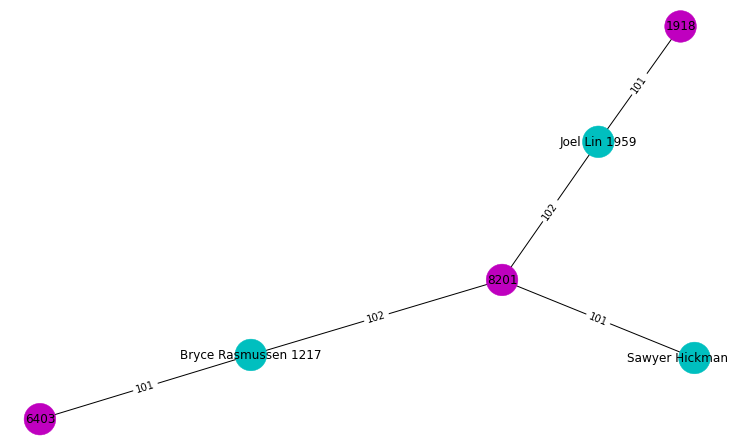

The 7673 network
10 nodes


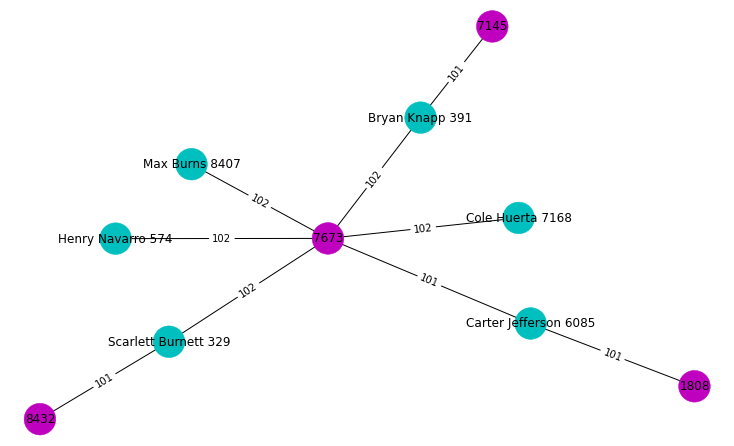

The 6288 network
10 nodes


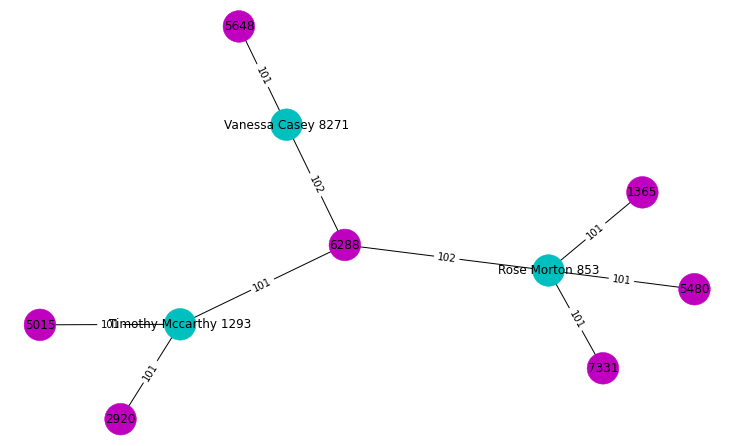

The 8929 network
6 nodes


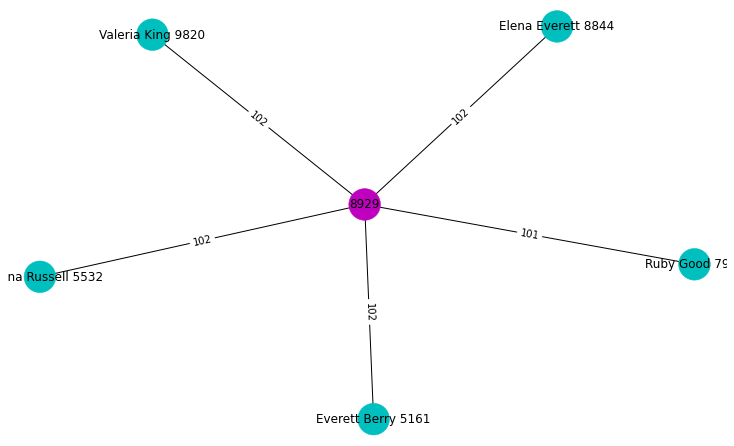

NameError: name 'df' is not defined

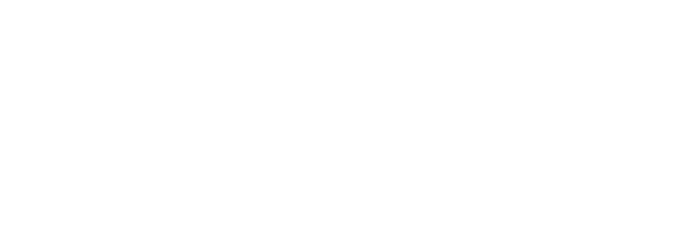

In [97]:
for i in range(8):
    
    graph = multi[i]
    
    #individual_nodes = []

    #for name in list(graph.nodes):
    #    if " " in str(name):
    #        individual_nodes.append(name)
            
    colors = generate_color_map(graph,ind)

    center = nx.center(graph)[0]
    title = graph.nodes[center]['label']
    degrees = nx.degree(graph)
    node_count = len(nx.nodes(graph))
    
    pos = nx.spring_layout(graph)
    nx.draw(graph, pos=pos, node_color=colors,   node_size=1000)
    node_labels = nx.get_node_attributes(graph,'label')

    nx.draw_networkx_labels(graph, pos=pos, labels = node_labels )
    edge_labels = nx.get_edge_attributes(graph, 'participation_type')
    nx.draw_networkx_edge_labels(graph, pos, edge_labels)
    
    print(f'The {title} network')
    print(str(node_count)+" nodes")
    plt.show()

    
    
fig, ax =plt.subplots(figsize=(12,4))

ax.axis('tight')
ax.axis('off')
the_table = ax.table(cellText=df.values,colLabels=df.columns,loc='center')

#https://stackoverflow.com/questions/4042192/reduce-left-and-right-margins-in-matplotlib-plot
pp = PdfPages("foo.pdf")
pp.savefig(fig, bbox_inches='tight')
pp.close()

### old code 

In [ ]:

#function to separate membership from individuals for display
#names,member_nbrs = get_network_members(degrees)

#function to join attributes back on subgraph node
#at = get_member_nbr_attributes(attributes,member_nbrs )

#print(pd.DataFrame.from_dict(nx.degree(graph)))
#print(names)
#print(at)

In [ ]:
def get_member_nbr_attributes(attribute_dataframe, node_dataframe):
    attributes = pd.merge(node_dataframe, attribute_dataframe, on = 'member_nbr')
    return(attributes)
    

In [100]:
#not necessary with new query
def get_network_members(degree_dictionary):
    td = pd.DataFrame.from_dict(degree_dictionary)
    names = td.loc[td[0].str.contains(r"([" "] | [a-z])", na=False)]
    names = names.rename(columns={0:'name/individual ID', 1:'degrees'})
    member_nbrs = td.loc[~td.index.isin(names.index)]
    member_nbrs = member_nbrs.rename(columns={0:'member_nbr', 1:'degrees'})

    return(names, member_nbrs)


In [27]:
###############
# Retain for proof of concept code

def generate_color_map(graph_object, individual_df):
    individual_nodes = list(ind['individual_id'])
    
    for name in list(graph_object.nodes):
        if " " in str(name):
            individual_nodes.append(name)
    
    for n in graph_object.nodes:
        graph_object.nodes[n]['color'] = 'c' if n in individual_nodes else 'm'
    
    colors = [node[1]['color'] for node in graph_object.nodes(data = True)]
    return(colors)

In [ ]:
#####################################################
#OLD QUERIES FOR PROOF OF CONCEPT
####################################################

# if using live datamart
t_sql_query = '''
select  a.member_nbr [source], concat((c.first_name + space(1) + c.last_name + space(1)),  a.individual_id) [target] , a.participation_type
from membershipparticipant_today a

--left join agr_membertotal_today b on a.member_nbr = b.member_nbr
left join individual_today c on a.individual_id = c.individual_id
'''

# if using sqlite demo database
sqlite_query = '''
select  
    a.member_nbr [source], 
    c.first_name || ' ' || c.last_name || ' '||  a.individual_id [target] , 
    a.participation_type, b.open_loan_bal

from membershipparticipant_today a

left join agr_membertotal_today b on a.member_nbr = b.member_nbr
left join individual_today c on a.individual_id = c.individual_id
'''

attribute_query = '''
select member_nbr, open_loan_bal
from agr_membertotal_today

'''

In [261]:
##THIS WORKS BUT IS IT REDUNDANT
memlist = list(mem['member_nbr'])
indlist = list(ind['individual_id'])
node_list = set(memlist + indlist)

def make_edge_list(edge_df):
    list1 = list(edge_df['source'])
    list2 = list(edge_df['target'])
    edge_list = list(zip(list1, list2))
    return(edge_list)

edge_list = make_edge_list(edges)

mem_dict = mem.set_index('member_nbr')
mem_dict = mem_dict.to_dict('index')

ind_dict = ind.set_index('individual_id')
ind_dict = ind_dict.to_dict('index')

g=nx.Graph()
g.add_nodes_from(indlist)
nx.set_node_attributes(g, ind_dict)

g.add_nodes_from(memlist)
nx.set_node_attributes(g, mem_dict)

g.add_edges_from(edge_list)

list(g.nodes.data())

[(7168, {'name': 'Cole Huerta', 'open_date': '2018-11-02'}),
 (8705, {'name': 'Daisy Rogers', 'open_date': '2012-12-05'}),
 (1538, {'name': 'Layla Floyd', 'open_date': '2005-10-07'}),
 (2053, {'name': 'Amir Oneill', 'open_date': '2008-10-19'}),
 (4619, {'name': 'Melanie Novak', 'open_date': '2015-09-05'}),
 (3598, {'name': 'Liliana Stephenson', 'open_date': '2005-01-07'}),
 (1567, {'name': 'Joseph Oneal', 'open_date': '2015-07-27'}),
 (5668, {'name': 'Piper Shaffer', 'open_date': '2015-09-14'}),
 (5161, {'name': 'Everett Berry', 'open_date': '2007-10-25'}),
 (5180, {'name': 'Nathaniel Barajas', 'open_date': '2015-08-27'}),
 (574, {'name': 'Henry Navarro', 'open_date': '2016-04-22'}),
 (9790, {'name': 'Graham Hunt', 'open_date': '2008-03-06'}),
 (9281, {'name': 'Eliza Stephens', 'open_date': '2011-10-18'}),
 (6725, {'name': 'Kai Richard', 'open_date': '2005-07-14'}),
 (3145, {'name': 'Carlos Valencia', 'open_date': '2014-12-31'}),
 (4172, {'name': 'Tucker Reed', 'open_date': '2002-08-09

In [264]:
#THIS WORKS TOO USING ONLY ONE PASS WITH ADDING EDGES, SETTING ATTRIBUTES

ind = pd.read_sql(node_individual_query, conn)
mem = pd.read_sql(member_individual_query, conn)
edges= pd.read_sql(edge_query, conn)

memlist = list(mem['member_nbr'])
indlist = list(ind['individual_id'])
node_list = set(memlist + indlist)

def make_edge_list(edge_df):
    list1 = list(edge_df['source'])
    list2 = list(edge_df['target'])
    edge_list = list(zip(list1, list2))
    return(edge_list)

edge_list = make_edge_list(edges)

mem_dict = mem.set_index('member_nbr')
mem_dict = mem_dict.to_dict('index')
ind_dict = ind.set_index('individual_id')
ind_dict = ind_dict.to_dict('index')

mem_dict.update(ind_dict)

g=nx.Graph()
g.add_edges_from(edge_list)
nx.set_node_attributes(g, mem_dict)

list(g.nodes.data())

[(7503,
  {'cls_ln_cnt': 2,
   'cls_sv_cnt': 4,
   'opn_ln_all_cnt': 0,
   'opn_sv_all_cnt': 4,
   'open_loan_bal': 0,
   'open_sv_bal': 218712,
   'div_ytd_amt': 2187.12,
   'int_ytd_amt': 0.0,
   'sv_sd_bal': 107294,
   'sv_sd_cnt': 4,
   'sv_cert_bal': 111418,
   'sv_cert_cnt': 0,
   'max_days_delnq_cnt': 38.0,
   'max_mths_delnq_cnt': 1,
   'wo_ln_cnt': 0,
   'wo_ln_bal': 0}),
 (9960, {'name': 'Oliver Zavala', 'open_date': '2005-11-22'}),
 (3987,
  {'cls_ln_cnt': 2,
   'cls_sv_cnt': 2,
   'opn_ln_all_cnt': 3,
   'opn_sv_all_cnt': 1,
   'open_loan_bal': 1100423,
   'open_sv_bal': 25705,
   'div_ytd_amt': 257.05,
   'int_ytd_amt': 55021.15,
   'sv_sd_bal': 16238,
   'sv_sd_cnt': 1,
   'sv_cert_bal': 9467,
   'sv_cert_cnt': 0,
   'max_days_delnq_cnt': 59.0,
   'max_mths_delnq_cnt': 2,
   'wo_ln_cnt': 0,
   'wo_ln_bal': 0}),
 (8846, {'name': 'Mackenzie Choi', 'open_date': '2006-05-02'}),
 (4924,
  {'cls_ln_cnt': 1,
   'cls_sv_cnt': 3,
   'opn_ln_all_cnt': 2,
   'opn_sv_all_cnt': 2,
   